In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Index(['Id', 'urban_type', 'geography_type', 'change_type',
       'img_red_mean_date1', 'img_green_mean_date1', 'img_blue_mean_date1',
       'img_red_std_date1', 'img_green_std_date1', 'img_blue_std_date1',
       'img_red_mean_date2', 'img_green_mean_date2', 'img_blue_mean_date2',
       'img_red_std_date2', 'img_green_std_date2', 'img_blue_std_date2',
       'img_red_mean_date3', 'img_green_mean_date3', 'img_blue_mean_date3',
       'img_red_std_date3', 'img_green_std_date3', 'img_blue_std_date3',
       'img_red_mean_date4', 'img_green_mean_date4', 'img_blue_mean_date4',
       'img_red_std_date4', 'img_green_std_date4', 'img_blue_std_date4',
       'img_red_mean_date5', 'img_green_mean_date5', 'img_blue_mean_date5',
       'img_red_std_date5', 'img_green_std_date5', 'img_blue_std_date5',
       'date0', 'change_status_date0', 'date1', 'change_status_date1', 'date2',
       'change_status_date2', 'date3', 'change_status_date3', 'date4',
       'change_status_date4', 'index', 'geom

**Data Preprocessing**

In [5]:
train_df.isna().any()

Id                      False
urban_type              False
geography_type          False
change_type             False
img_red_mean_date1       True
img_green_mean_date1     True
img_blue_mean_date1      True
img_red_std_date1        True
img_green_std_date1      True
img_blue_std_date1       True
img_red_mean_date2       True
img_green_mean_date2     True
img_blue_mean_date2      True
img_red_std_date2        True
img_green_std_date2      True
img_blue_std_date2       True
img_red_mean_date3       True
img_green_mean_date3     True
img_blue_mean_date3      True
img_red_std_date3        True
img_green_std_date3      True
img_blue_std_date3       True
img_red_mean_date4       True
img_green_mean_date4     True
img_blue_mean_date4      True
img_red_std_date4        True
img_green_std_date4      True
img_blue_std_date4       True
img_red_mean_date5       True
img_green_mean_date5     True
img_blue_mean_date5      True
img_red_std_date5        True
img_green_std_date5      True
img_blue_s

In [8]:
train_df.dropna(how='any')

,Id,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,0,Sparse Urban,"Dense Forest,Grass Land",Road,93.371775,107.291113,89.827379,29.812040,28.328368,25.324294,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,0,"POLYGON ((112.16774086470313 32.0219772550438,..."
1,1,Sparse Urban,"Dense Forest,Grass Land",Road,96.071674,107.061702,90.755556,24.896240,22.275180,22.080686,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Construction Midway,1,POLYGON ((112.16848748857684 32.02047741874698...
2,2,Sparse Urban,"Dense Forest,Grass Land",Road,101.212148,113.462178,95.670574,24.179684,21.873401,21.285197,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Land Cleared,2,POLYGON ((112.16891598575654 32.01968680736571...
3,3,Rural,"Dense Forest,Grass Land",Road,94.463311,99.995531,84.470046,26.869852,23.767679,19.351983,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,3,POLYGON ((112.16966260963025 32.01809977128419...
4,4,Dense Urban,"Sparse Forest,Dense Forest,Farms",Demolition,151.883646,191.710197,211.569244,52.465332,59.441844,52.304349,...,09-12-2013,Prior Construction,10-09-2016,Prior Construction,22-07-2019,Land Cleared,24-07-2017,Prior Construction,4,POLYGON ((112.16668909889843 32.01597209653754...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296141,296141,"N,A",Coastal,Commercial,239.297084,229.193482,215.205832,25.969706,31.586712,32.155574,...,25-02-2017,Construction Done,27-01-2014,Land Cleared,28-03-2018,Construction Done,28-12-2015,Land Cleared,296141,POLYGON ((-109.72152459010317 23.0066533756951...
296142,296142,Sparse Urban,"Coastal,Sparse Forest",Residential,162.912319,143.865217,122.935145,56.127846,44.184674,49.760802,...,25-02-2017,Construction Done,27-01-2014,Greenland,28-03-2018,Construction Done,28-12-2015,Land Cleared,296142,POLYGON ((-109.71609584286993 23.0198263729402...
296143,296143,Sparse Urban,Dense Forest,Residential,111.304320,94.723404,80.374597,21.540545,17.786801,18.143091,...,25-02-2017,Construction Done,27-01-2014,Greenland,28-03-2018,Construction Done,28-12-2015,Greenland,296143,POLYGON ((-109.71829071914367 23.0278352707854...
296144,296144,Sparse Urban,Dense Forest,Residential,137.374613,136.108359,113.544892,32.344779,30.077877,29.759516,...,25-02-2017,Land Cleared,27-01-2014,Land Cleared,28-03-2018,Construction Midway,28-12-2015,Land Cleared,296144,POLYGON ((-109.71771355537564 23.0279396079221...


In [18]:
le = LabelEncoder()
train_df['urban_type'] = le.fit_transform(train_df.urban_type.values)
train_df['geography_type'] = le.fit_transform(train_df.geography_type.values)
train_df['change_type'] = le.fit_transform(train_df.change_type.values)

train_df[[f'{"change_status_date"}{str(i)}' for i in range(1,5)]] = train_df[[f'{"change_status_date"}{str(i)}' for i in range(1,5)]].apply(LabelEncoder().fit_transform)



,change_status_date1,change_status_date2,change_status_date3,change_status_date4
0,4,2,0,1
1,4,5,0,1
2,4,5,0,5
3,4,2,0,1
4,9,9,5,9
...,...,...,...,...
296141,0,5,0,5
296142,0,4,0,5
296143,0,4,0,4
296144,5,5,1,5


In [20]:
for i in range(5):
    train_df[f'{"date"}{str(i)}'] = pd.to_datetime(train_df[f'{"date"}{str(i)}'],format='%d-%m-%Y')
train_df

,Id,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,0,8,72,5,93.371775,107.291113,89.827379,29.812040,28.328368,25.324294,...,2013-12-09,4,2016-09-10,2,2019-07-22,0,2017-07-24,1,0,"POLYGON ((112.16774086470313 32.0219772550438,..."
1,1,8,72,5,96.071674,107.061702,90.755556,24.896240,22.275180,22.080686,...,2013-12-09,4,2016-09-10,5,2019-07-22,0,2017-07-24,1,1,POLYGON ((112.16848748857684 32.02047741874698...
2,2,8,72,5,101.212148,113.462178,95.670574,24.179684,21.873401,21.285197,...,2013-12-09,4,2016-09-10,5,2019-07-22,0,2017-07-24,5,2,POLYGON ((112.16891598575654 32.01968680736571...
3,3,6,72,5,94.463311,99.995531,84.470046,26.869852,23.767679,19.351983,...,2013-12-09,4,2016-09-10,2,2019-07-22,0,2017-07-24,1,3,POLYGON ((112.16966260963025 32.01809977128419...
4,4,0,158,1,151.883646,191.710197,211.569244,52.465332,59.441844,52.304349,...,2013-12-09,9,2016-09-10,9,2019-07-22,5,2017-07-24,9,4,POLYGON ((112.16668909889843 32.01597209653754...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296141,296141,5,38,0,239.297084,229.193482,215.205832,25.969706,31.586712,32.155574,...,2017-02-25,0,2014-01-27,5,2018-03-28,0,2015-12-28,5,296141,POLYGON ((-109.72152459010317 23.0066533756951...
296142,296142,8,55,4,162.912319,143.865217,122.935145,56.127846,44.184674,49.760802,...,2017-02-25,0,2014-01-27,4,2018-03-28,0,2015-12-28,5,296142,POLYGON ((-109.71609584286993 23.0198263729402...
296143,296143,8,67,4,111.304320,94.723404,80.374597,21.540545,17.786801,18.143091,...,2017-02-25,0,2014-01-27,4,2018-03-28,0,2015-12-28,4,296143,POLYGON ((-109.71829071914367 23.0278352707854...
296144,296144,8,67,4,137.374613,136.108359,113.544892,32.344779,30.077877,29.759516,...,2017-02-25,5,2014-01-27,5,2018-03-28,1,2015-12-28,5,296144,POLYGON ((-109.71771355537564 23.0279396079221...


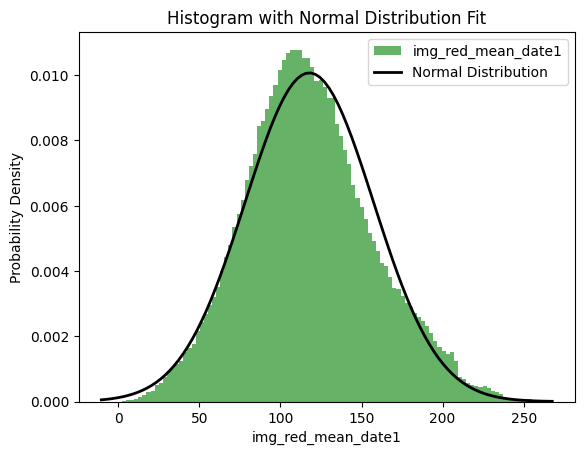

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Extract your data from the DataFrame
data = train_df['img_red_mean_date1']

# Calculate mean and standard deviation of your data
mean = data.mean()
std = data.std()

# Plot the histogram of your data
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='img_red_mean_date1')

# Plot the normal distribution using mean and std
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add labels and title
plt.xlabel('img_red_mean_date1')
plt.ylabel('Probability Density')
plt.title('Histogram with Normal Distribution Fit')

# Show the legend
plt.legend()

# Show the plot
plt.show()
